In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score,classification_report

import warnings
warnings.filterwarnings("ignore")

In [6]:
names = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [7]:
df = pd.read_csv("steel.txt", sep = '\t', header=None, names = names)

In [8]:
from xlsxwriter.utility import xl_rowcol_to_cell
conditions=[(df['Pastry'] == 1) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0), (df['Pastry'] == 0) & (df['Z_Scratch'] == 1)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 1)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 1)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 1)& (df['Bumps'] == 0)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 1)& (df['Other_Faults'] == 0),(df['Pastry'] == 0) & (df['Z_Scratch'] == 0)& (df['K_Scatch'] == 0)& (df['Stains'] == 0)& (df['Dirtiness'] == 0)& (df['Bumps'] == 0)& (df['Other_Faults'] == 1)]
choices = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['class'] = np.select(conditions, choices)

drp_cols=['TypeOfSteel_A400','Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df.drop(choices, inplace=True,axis = 1)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,class
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X_Minimum,1941.0,5.711360e+02,5.206907e+02,0.0000,51.0000,4.350000e+02,1.053000e+03,1.705000e+03
X_Maximum,1941.0,6.179645e+02,4.976274e+02,4.0000,192.0000,4.670000e+02,1.072000e+03,1.713000e+03
Y_Minimum,1941.0,1.650685e+06,1.774578e+06,6712.0000,471253.0000,1.204128e+06,2.183073e+06,1.298766e+07
Y_Maximum,1941.0,1.650739e+06,1.774590e+06,6724.0000,471281.0000,1.204136e+06,2.183084e+06,1.298769e+07
Pixels_Areas,1941.0,1.893878e+03,5.168460e+03,2.0000,84.0000,1.740000e+02,8.220000e+02,1.526550e+05
X_Perimeter,1941.0,1.118552e+02,3.012092e+02,2.0000,15.0000,2.600000e+01,8.400000e+01,1.044900e+04
Y_Perimeter,1941.0,8.296600e+01,4.264829e+02,1.0000,13.0000,2.500000e+01,8.300000e+01,1.815200e+04
Sum_of_Luminosity,1941.0,2.063121e+05,5.122936e+05,250.0000,9522.0000,1.920200e+04,8.301100e+04,1.159141e+07
Minimum_of_Luminosity,1941.0,8.454869e+01,3.213428e+01,0.0000,63.0000,9.000000e+01,1.060000e+02,2.030000e+02
Maximum_of_Luminosity,1941.0,1.301937e+02,1.869099e+01,37.0000,124.0000,1.270000e+02,1.400000e+02,2.530000e+02


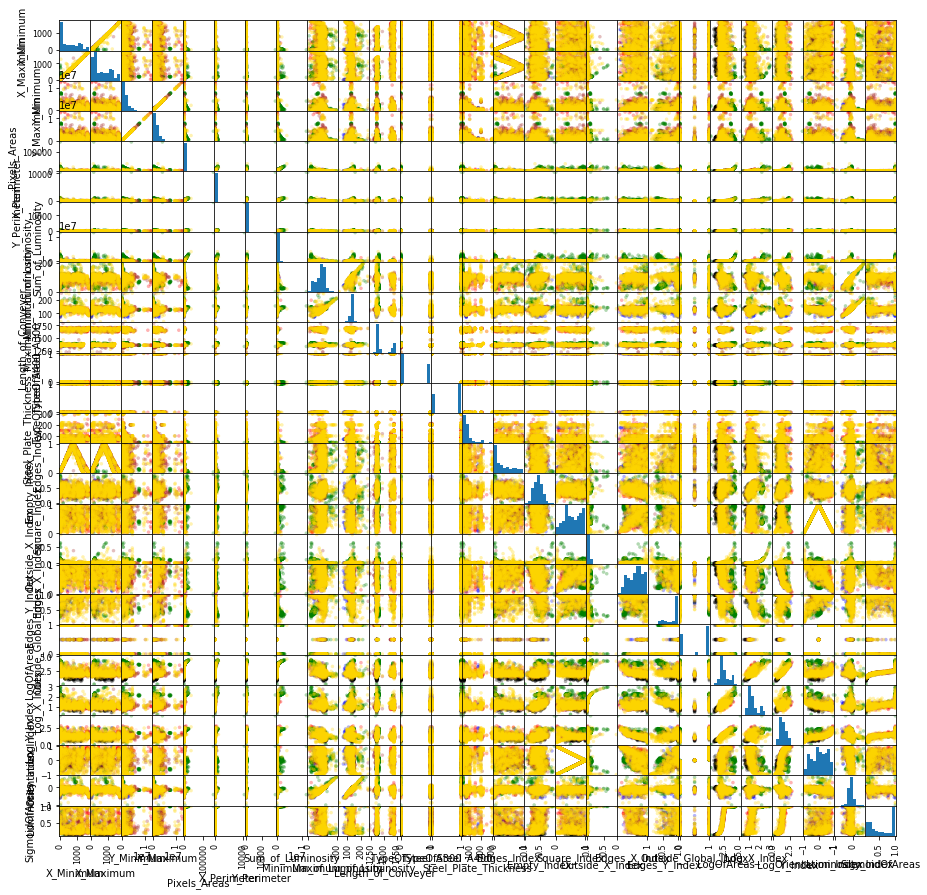

In [11]:
# 1. EDA
## Coloring the Outcomes
color_code = {'Pastry':'Red', 'Z_Scratch':'Blue', 'K_Scatch':'Green', 'Stains':'Black', 'Dirtiness':'Pink', 'Bumps':'Brown', 'Other_Faults':'Gold'}
color_list = [color_code.get(i) for i in df.loc[:,'class']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.3,
                                       s = 50)
plt.show()

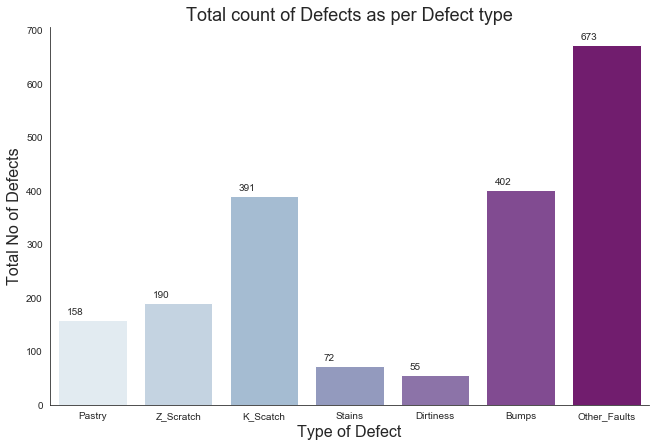

In [12]:
# 1.1 Count plot to show the number of Defects belonging to each Defect Type
sns.set_style("white")
g = sns.factorplot(x="class", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Type of Defect",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total No of Defects", fontdict= {'size':16})
g.ax.set_title("Total count of Defects as per Defect type",fontdict= {'size':18})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10))
    
#We can expect the model to be biased towards 'Other_Faults','Bumps' and 'K_Scratch' as they are high in proportion.

In [13]:
## Only Non-categorical columns
df.describe().columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [14]:
# 1.2  Visual analysis of the correlation between the Factors
corr = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']].corr()

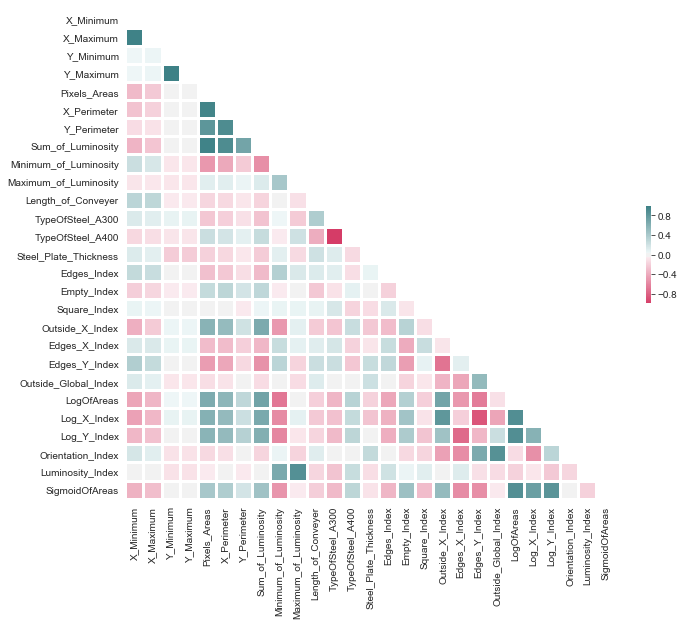

In [15]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1,200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=2, cbar_kws={"shrink": .2}, annot  = False)

In [16]:
#1.3 Correlation matrix
display(df.corr())


# 'TypeOfSteel_A400' is redundant as it's the opposite of 'TypeOfSteel_A300'

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
X_Minimum,1.000000,0.988314,0.041821,0.041807,-0.307322,-0.258937,-0.118757,-0.339045,0.237637,-0.075554,...,-0.361160,0.154778,0.367907,0.147282,-0.428553,-0.437944,-0.326851,0.178585,-0.031578,-0.355251
X_Maximum,0.988314,1.000000,0.052147,0.052135,-0.225399,-0.186326,-0.090138,-0.247052,0.168649,-0.062392,...,-0.214930,0.149259,0.271915,0.099253,-0.332169,-0.324012,-0.265990,0.115019,-0.038996,-0.286736
Y_Minimum,0.041821,0.052147,1.000000,1.000000,0.017670,0.023843,0.024150,0.007362,-0.065703,-0.067785,...,0.054165,0.066085,-0.036543,-0.062911,0.044952,0.070406,-0.008442,-0.086497,-0.090654,0.025257
Y_Maximum,0.041807,0.052135,1.000000,1.000000,0.017840,0.024038,0.024380,0.007499,-0.065733,-0.067776,...,0.054185,0.066051,-0.036549,-0.062901,0.044994,0.070432,-0.008382,-0.086480,-0.090666,0.025284
Pixels_Areas,-0.307322,-0.225399,0.017670,0.017840,1.000000,0.966644,0.827199,0.978952,-0.497204,0.110063,...,0.588606,-0.294673,-0.463571,-0.109655,0.650234,0.603072,0.578342,-0.137604,-0.043449,0.422947
X_Perimeter,-0.258937,-0.186326,0.023843,0.024038,0.966644,1.000000,0.912436,0.912956,-0.400427,0.111363,...,0.517098,-0.293039,-0.412100,-0.079106,0.563036,0.524716,0.523472,-0.101731,-0.032617,0.380605
Y_Perimeter,-0.118757,-0.090138,0.024150,0.024380,0.827199,0.912436,1.000000,0.704876,-0.213758,0.061809,...,0.209160,-0.195162,-0.136723,0.013438,0.294040,0.228485,0.344378,0.031381,-0.047778,0.191772
Sum_of_Luminosity,-0.339045,-0.247052,0.007362,0.007499,0.978952,0.912956,0.704876,1.000000,-0.540566,0.136515,...,0.658339,-0.327728,-0.529745,-0.121090,0.712128,0.667736,0.618795,-0.158483,-0.014067,0.464248
Minimum_of_Luminosity,0.237637,0.168649,-0.065703,-0.065733,-0.497204,-0.400427,-0.213758,-0.540566,1.000000,0.429605,...,-0.487574,0.252256,0.316610,0.035462,-0.678762,-0.567655,-0.588208,0.057123,0.669534,-0.514797
Maximum_of_Luminosity,-0.075554,-0.062392,-0.067785,-0.067776,0.110063,0.111363,0.061809,0.136515,0.429605,1.000000,...,0.099300,0.093522,-0.167441,-0.124039,0.007672,0.092823,-0.069522,-0.169747,0.870160,-0.039651


In [25]:
# 1.4 Clustering
# 1.4.1 Standardizing the Data before Clustering

df_z = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']].apply(zscore)

In [28]:
# 1.4.2 Finding Error for each cluster
cluster_range = range( 2, 15) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
    # Use scaled data in the fit() function.
  clusters.fit(df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

print(clusters_df)

    num_clusters  cluster_errors
0              2    38811.769106
1              3    34328.705852
2              4    30177.163338
3              5    27715.849123
4              6    25947.899587
5              7    24832.798333
6              8    22924.467104
7              9    21456.518385
8             10    20490.150048
9             11    19588.280425
10            12    18789.988761
11            13    18179.547332
12            14    17629.313323


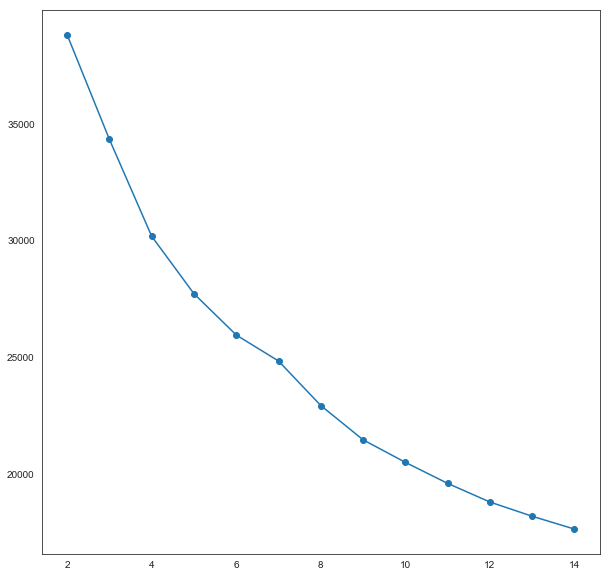

In [29]:
# 1.4.3 Elbow Plot
plt.figure(figsize=(10,10))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [30]:
#It is still unclear what cluster number is the best. Hence, we shall go forward with Silhouette Analysis


For n_clusters = 2 The average silhouette_score is : 0.31191262712241896


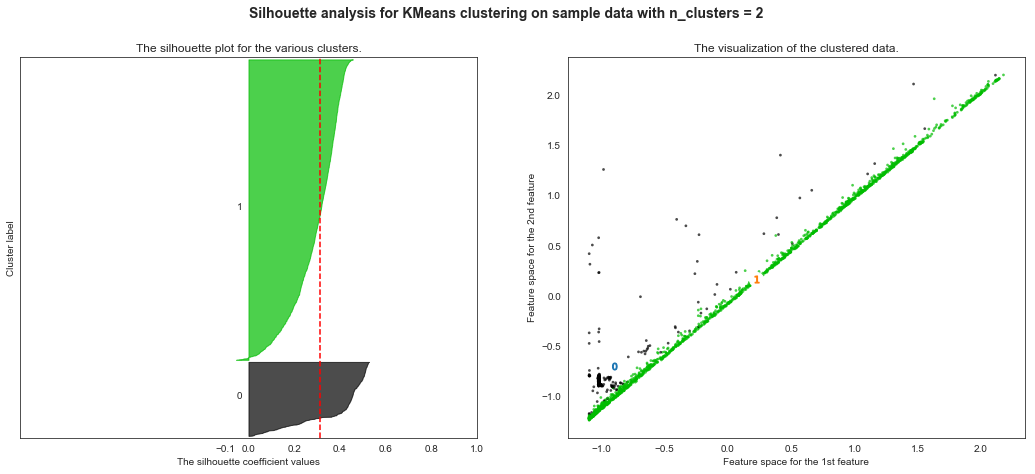

For n_clusters = 3 The average silhouette_score is : 0.19464142811539867


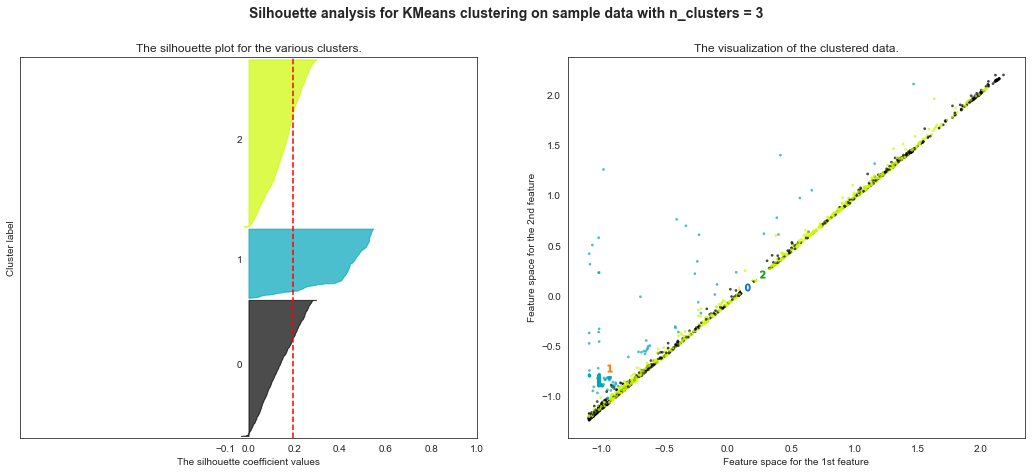

For n_clusters = 4 The average silhouette_score is : 0.18254869753193512


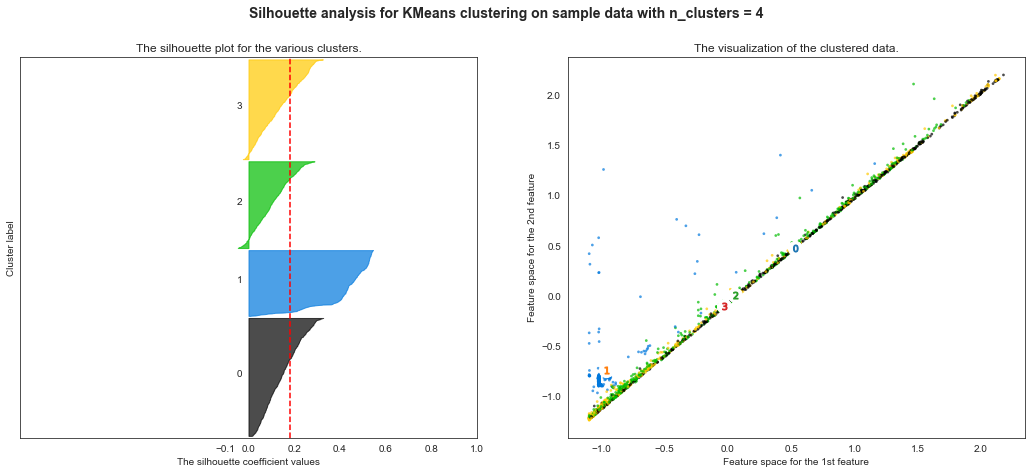

For n_clusters = 5 The average silhouette_score is : 0.1903729113613477


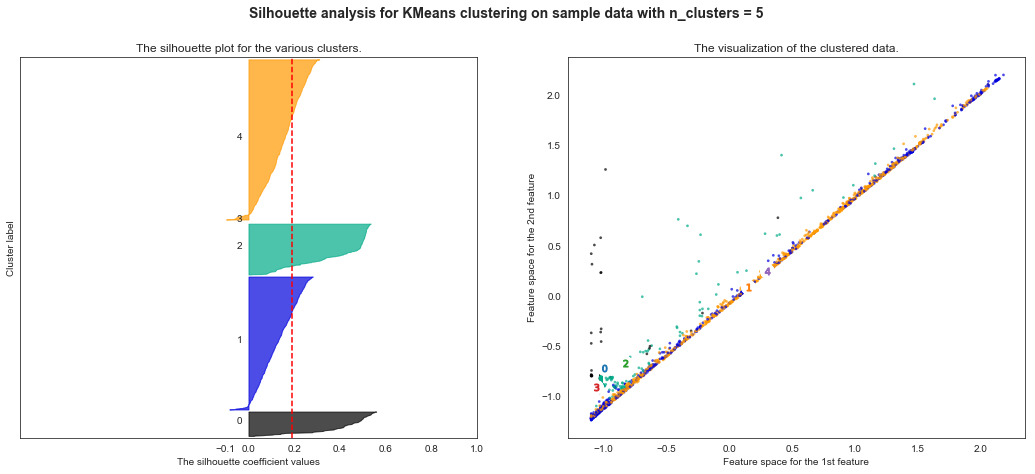

For n_clusters = 6 The average silhouette_score is : 0.18490718696636926


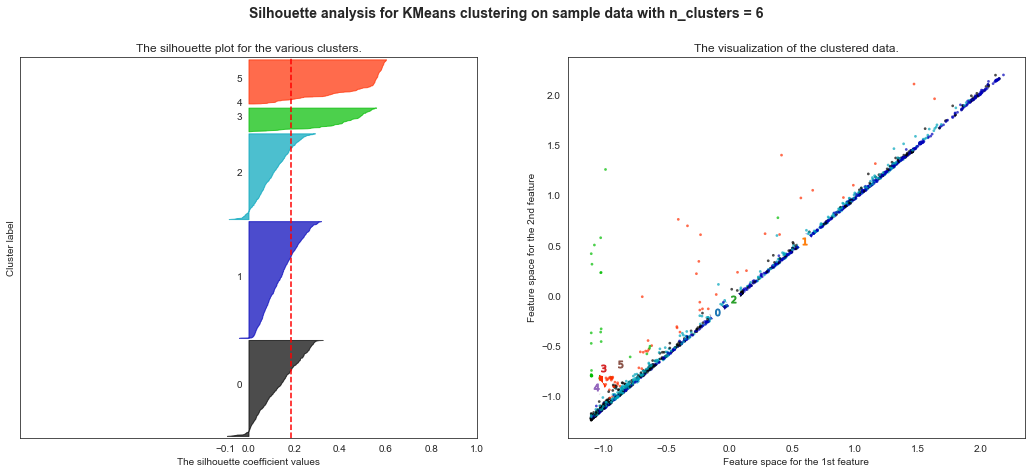

For n_clusters = 7 The average silhouette_score is : 0.19217375628334868


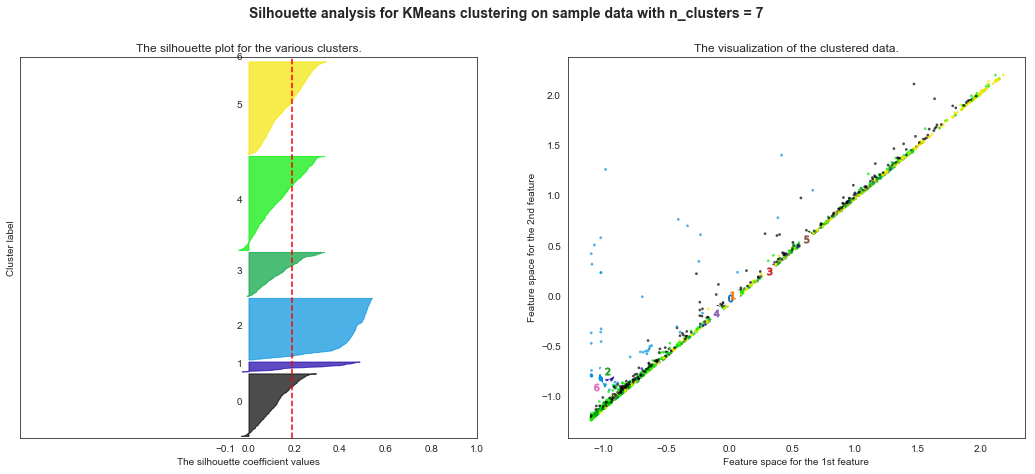

For n_clusters = 8 The average silhouette_score is : 0.2012481873129015


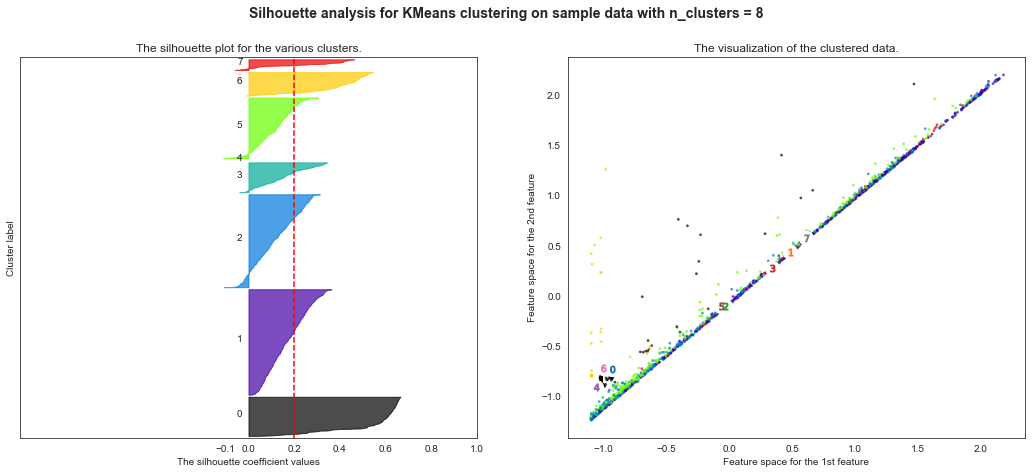

For n_clusters = 9 The average silhouette_score is : 0.2028462191978425


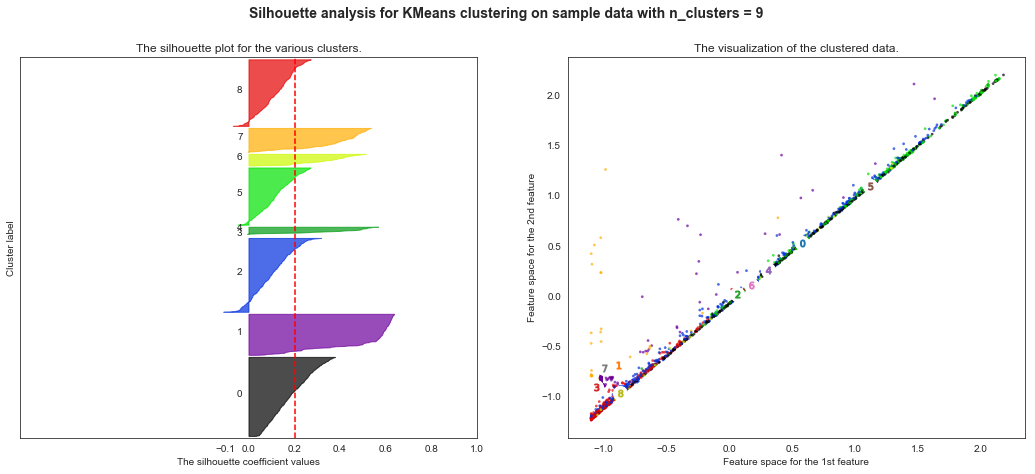

For n_clusters = 10 The average silhouette_score is : 0.19990930329415918


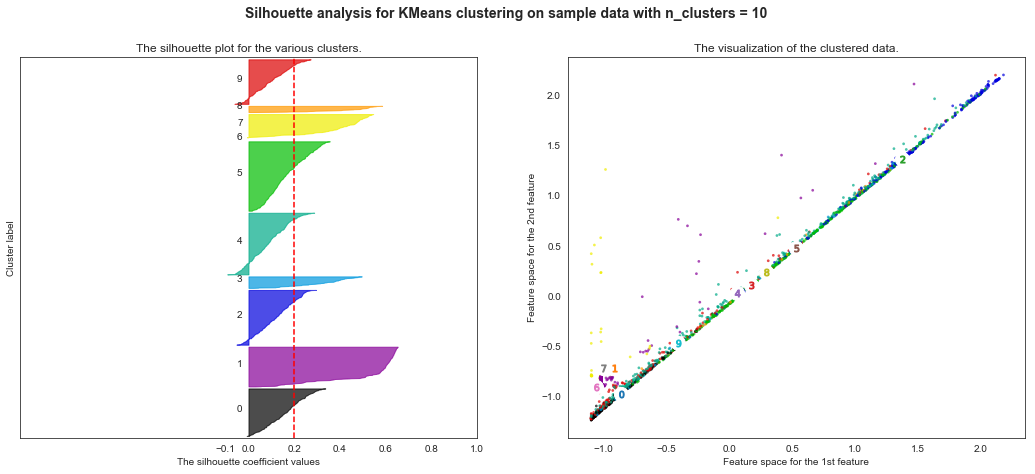

For n_clusters = 11 The average silhouette_score is : 0.20013249137059982


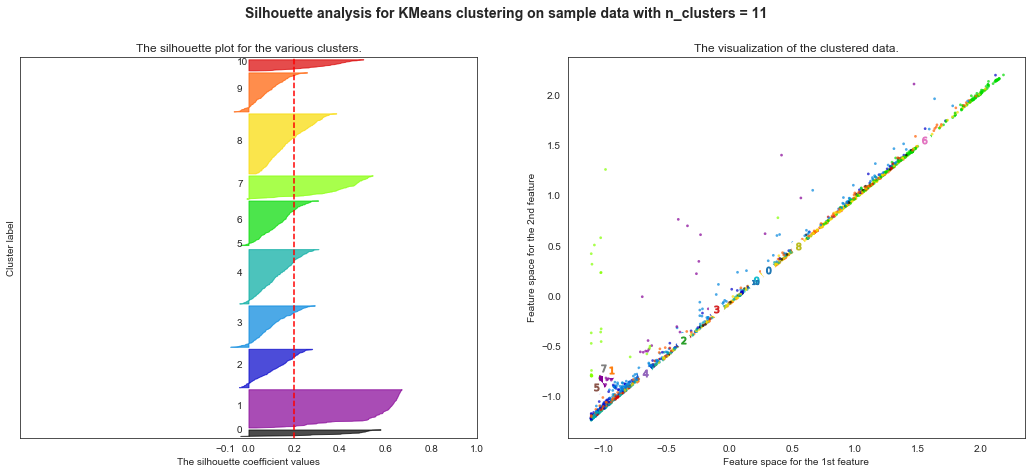

For n_clusters = 12 The average silhouette_score is : 0.20504072662215214


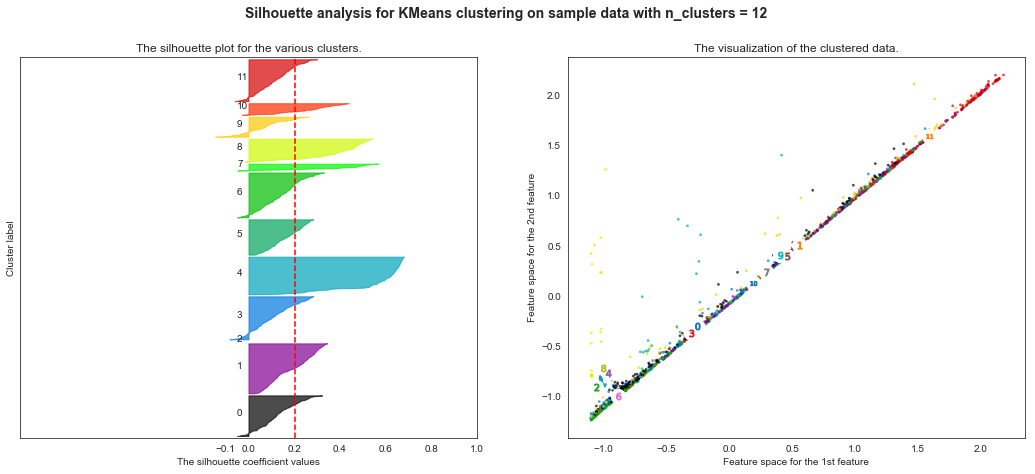

For n_clusters = 13 The average silhouette_score is : 0.2056002944310713


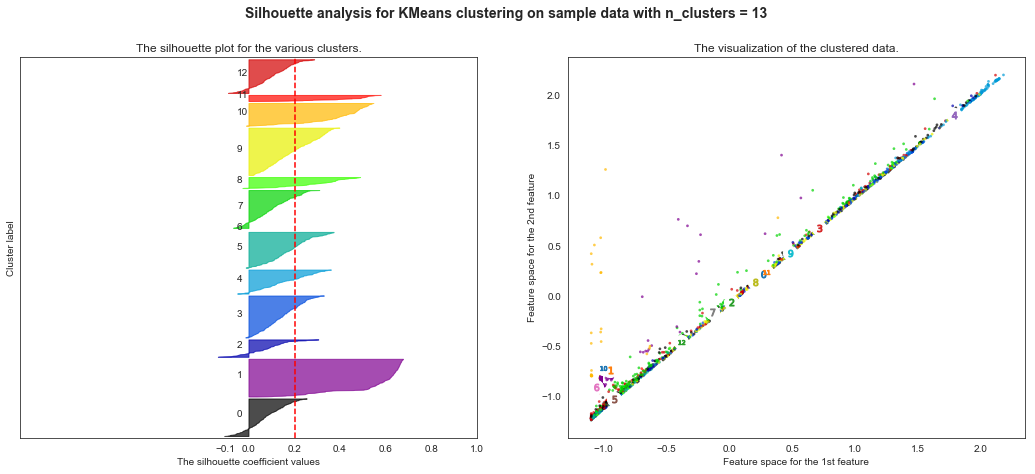

For n_clusters = 14 The average silhouette_score is : 0.21062959800814351


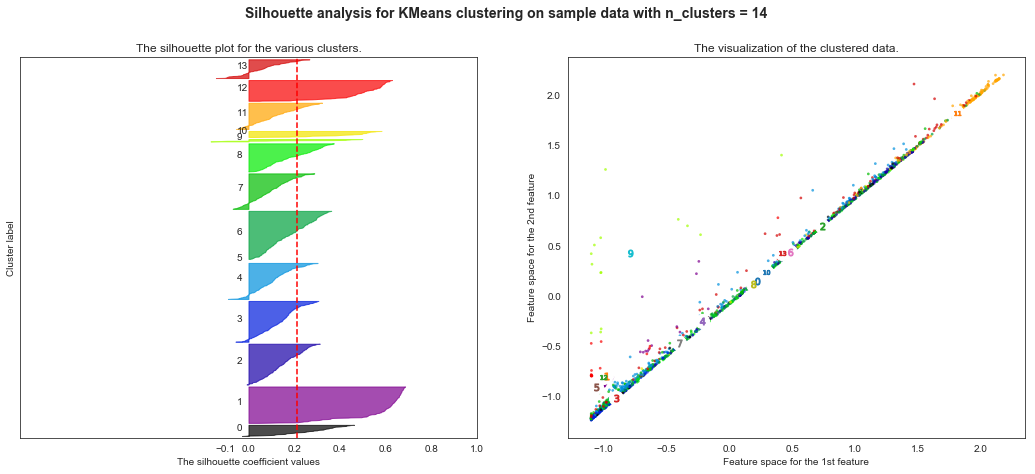

In [33]:
# 1.4.4 Silhouette Analysis
cluster_range = range( 2, 15 )

for n_clusters in cluster_range:
  # Create a subplot with 1 row and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  ax1.set_xlim([-1, 1])
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.
  ax1.set_ylim([0, len(df_z) + (n_clusters + 1) * 10])
    
  # Initialize the clusterer with n_clusters value and a random generator
  # seed of 10 for reproducibility.
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( df_z )

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed
  # clusters
  silhouette_avg = silhouette_score(df_z, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(df_z, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = plt.cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")
 # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(df_z.values[:, 0], df_z.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

# For n_clusters = 2 The average silhouette_score is : 0.31191262712241896


   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0  -1.016481  -1.141639  -0.777729  -0.777729     -0.314852    -0.314996   
1   0.141894   0.066403   0.500188   0.500171     -0.345623    -0.338242   
2   0.495362   0.436253  -0.054546  -0.054566     -0.352784    -0.344883   
3   0.541467   0.486504  -0.722225  -0.722225     -0.332463    -0.328279   
4   1.379032   1.382988  -0.649678  -0.649559      0.099692    -0.172201   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0    -0.091389          -0.355537              -0.266099   
1    -0.124225          -0.380574              -0.017079   
2    -0.150024          -0.387261               0.449832   
3    -0.089044          -0.365736               0.449832   
4     0.415209           0.079307              -1.480069   

   Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
0              -1.187708  ...      -0.575331       0.796401   
1              -0.384975  ...      -0.043290       0.654

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9B46B0390>,
      dtype=object)

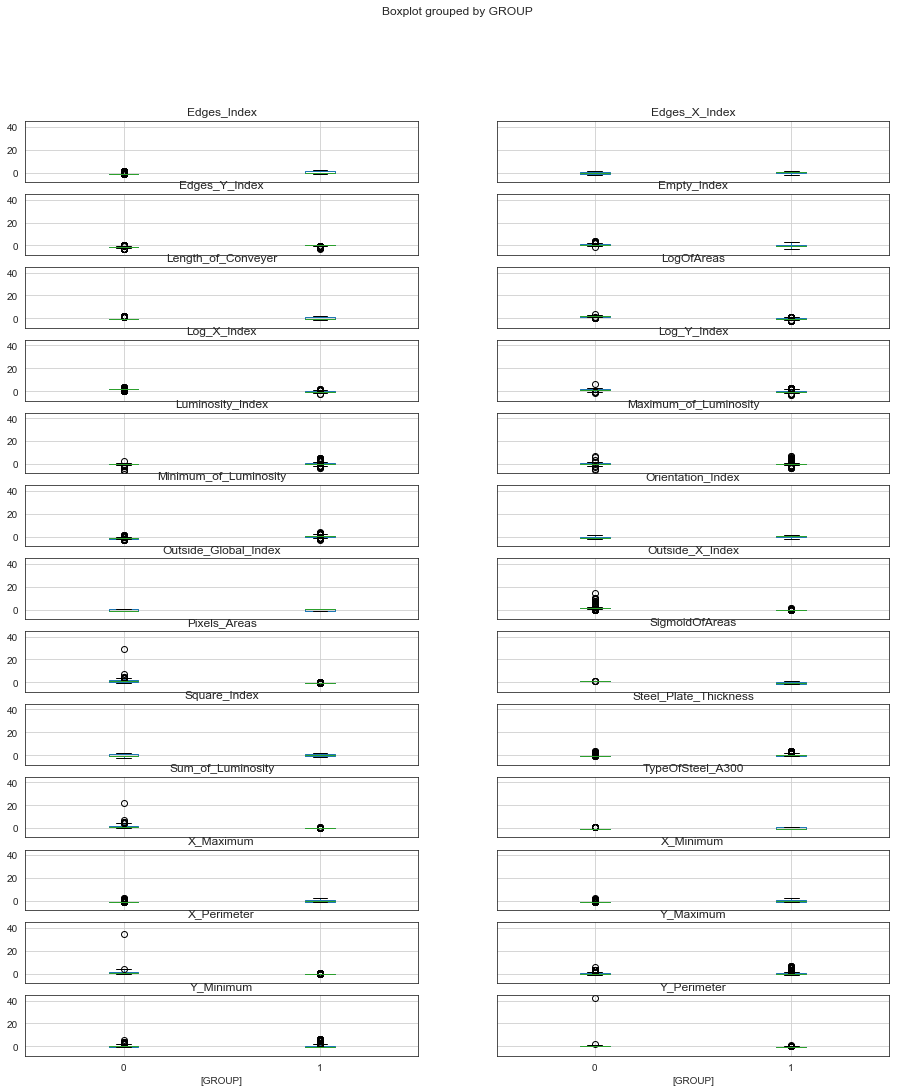

In [34]:

cluster = KMeans( n_clusters = 2, random_state = 100 )
cluster.fit(df_z)
        # To get the values of Centroid
centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_z) )
    #print(centroid_df)
prediction=cluster.predict(df_z)
df_z["GROUP"] = prediction
print(df_z.head())

        ## Observing the Clusters
df_z.boxplot(by = 'GROUP',layout=(15,2) ,figsize=(15, 20))

In [35]:
# 2. Model Development and Classification
#2.1 Data Preparation

x = df[['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300',  'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']]
y = df['class']


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =1, stratify = y)

In [37]:
## Normalization

x_train = x_train.apply(zscore)
x_test = x_test.apply(zscore)

In [38]:
x_train.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,...,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03,1.552000e+03
mean,-5.880176e-17,-1.716840e-17,4.864379e-17,7.332336e-17,-1.355588e-17,-3.038449e-17,5.356182e-18,1.466467e-18,1.442145e-16,-3.983068e-16,...,-1.303367e-16,-5.708492e-17,-1.730431e-16,1.251862e-16,5.227777e-16,-3.436183e-16,3.662591e-17,1.101639e-17,1.176035e-16,5.207747e-17
std,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,...,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00,1.000322e+00
min,-1.088906e+00,-1.224704e+00,-9.311520e-01,-9.311682e-01,-3.507202e-01,-3.435531e-01,-1.763080e-01,-3.919739e-01,-2.647958e+00,-5.026234e+00,...,-5.669336e-01,-2.501633e+00,-3.206979e+00,-1.160003e+00,-2.763171e+00,-2.150918e+00,-3.061040e+00,-2.094173e+00,-5.895129e+00,-1.365812e+00
25%,-9.919739e-01,-8.471459e-01,-6.741165e-01,-6.740999e-01,-3.358565e-01,-3.031699e-01,-1.509437e-01,-3.748848e-01,-6.587325e-01,-3.379156e-01,...,-4.770644e-01,-7.740283e-01,-9.477897e-01,-1.160003e+00,-7.185383e-01,-7.057120e-01,-6.920435e-01,-8.744709e-01,-4.251109e-01,-1.000863e+00
50%,-2.988334e-01,-3.042782e-01,-2.387872e-01,-2.388073e-01,-3.198918e-01,-2.658932e-01,-1.255794e-01,-3.562236e-01,1.603605e-01,-1.762494e-01,...,-4.136274e-01,1.035380e-01,5.731027e-01,9.022246e-01,-3.251793e-01,-3.416195e-01,-1.586240e-01,3.297919e-02,-1.160030e-02,-2.548046e-01
75%,9.262181e-01,9.064596e-01,2.916699e-01,2.916719e-01,-2.046981e-01,-9.504134e-02,-2.985317e-03,-2.425218e-01,6.908207e-01,5.243039e-01,...,-1.757383e-01,7.750598e-01,8.076703e-01,9.022246e-01,5.232973e-01,3.931818e-01,7.418231e-01,8.580598e-01,4.455360e-01,1.222326e+00
max,2.233102e+00,2.259037e+00,6.289125e+00,6.289059e+00,2.766149e+01,3.210898e+01,3.818931e+01,2.156229e+01,3.686361e+00,6.613729e+00,...,1.034777e+01,1.609248e+00,8.076703e-01,9.022246e-01,3.406614e+00,3.302201e+00,6.287410e+00,1.831643e+00,5.247249e+00,1.222914e+00


In [39]:
"""The below function 'modelEval' is created for the following purpose:
     1. To fit the model
     2. To find the predicted class.
     2. To showcase the model's confusion matrix.
     3. To Evaluate the model's accuracy
     4. To Report models' Precision, recall and F-1 Score."""

"The below function 'modelEval' is created for the following purpose:\n     1. To fit the model\n     2. To find the predicted class.\n     2. To showcase the model's confusion matrix.\n     3. To Evaluate the model's accuracy\n     4. To Report models' Precision, recall and F-1 Score."

In [63]:
def modelEval(model):
    model.fit(x_train, y_train)
    print("\nBest Parameters :",model.best_params_)
    predicted = model.predict(x_test)
    cMatrix = confusion_matrix(y_test, predicted)
    print("\n",cMatrix)
    print("\nModel Accuracy :", round(model.score(x_test,y_test)*100,3))
    print(classification_report(y_test, predicted))

In [64]:
# 2.2 Model Development
#2.2.4 Decision Trees
#For Decision Trees, an experimentation on parameters 'splitting criteria', 'minimum samples required to split', 'max depth of the tree', 'minimum samples required at the leaf level' and the 'maximum features' to consider when looking for the best split. The following values of the parameters attained the best accuracy during classification. Results in the table below.

#Splitting criteria: Entropy (Using Entropy marginally outperformed Gini Index with a higher accuracy.)
#Min samples required to split: 10 (Best amongst 2,5,10,15.)
#Max Depth: None(Performs better than 'auto', 'log2' and 'sqrt'.)
#Maximum Features : None (Performs better than 'auto','sqrt', 'log2')
#Min samples required at leaf: 3 (Best amongst 1,3,10,15.)


In [66]:
lm = LogisticRegression()
params = { 'penalty': ['l1','l2'],'C': [0.01,0.1,0.5,0.9,1,5,10], 'tol': [ 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2 ], 'solver': ['liblinear']}
GSLR = GridSearchCV(lm, params, cv=10)

In [67]:

modelEval(GSLR)


Best Parameters : {'C': 0.9, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}

 [[54  0  0 25  1  0  1]
 [ 0  5  0  6  0  0  0]
 [ 5  0 69  2  2  0  0]
 [34  0  9 82  6  0  4]
 [ 4  0  0 13 14  0  1]
 [ 0  0  0  0  0 14  0]
 [ 2  0  0  8  0  0 28]]

Model Accuracy : 68.38
              precision    recall  f1-score   support

       Bumps       0.55      0.67      0.60        81
   Dirtiness       1.00      0.45      0.62        11
    K_Scatch       0.88      0.88      0.88        78
Other_Faults       0.60      0.61      0.61       135
      Pastry       0.61      0.44      0.51        32
      Stains       1.00      1.00      1.00        14
   Z_Scratch       0.82      0.74      0.78        38

    accuracy                           0.68       389
   macro avg       0.78      0.68      0.71       389
weighted avg       0.69      0.68      0.68       389



In [77]:
#%


In [81]:
nb = GaussianNB()

In [82]:
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
y_test_naive = nb.predict(x_test)

In [85]:
print(confusion_matrix(y_test, y_test_naive))
print("\n\n The Accuracy is :",round(nb.score(x_test, y_test)*100,2))
print(classification_report(y_test, y_test_naive))

[[ 8  1  0 34 33  0  5]
 [ 0  2  0  1  8  0  0]
 [ 0  0  0 77  1  0  0]
 [11  4  0 68 40  0 12]
 [ 0  1  0  3 27  0  1]
 [ 0  0  0 14  0  0  0]
 [ 0  1  0  4  3  0 30]]


 The Accuracy is : 34.7
              precision    recall  f1-score   support

       Bumps       0.42      0.10      0.16        81
   Dirtiness       0.22      0.18      0.20        11
    K_Scatch       0.00      0.00      0.00        78
Other_Faults       0.34      0.50      0.40       135
      Pastry       0.24      0.84      0.38        32
      Stains       0.00      0.00      0.00        14
   Z_Scratch       0.62      0.79      0.70        38

    accuracy                           0.35       389
   macro avg       0.26      0.35      0.26       389
weighted avg       0.29      0.35      0.28       389

